# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}{city}&units=metric&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response_json = requests.get(city_url).json()
        city_weather = response_json["weather"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response_json["coord"]["lat"]
        city_lng = response_json["coord"]["lon"]
        city_max_temp = response_json["main"]["temp_max"]
        city_humidity = response_json["main"]["humidity"]
        city_clouds = response_json["clouds"]["all"]
        city_wind = response_json["wind"]["speed"]
        city_country = response_json["sys"]["country"]
        city_date = response_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | rongelap
Processing Record 3 of Set 1 | magadan
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | karamay
City not found. Skipping...
Processing Record 7 of Set 1 | enewetak
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | port mathurin
Processing Record 11 of Set 1 | uturoa
Processing Record 12 of Set 1 | vorgashor
Processing Record 13 of Set 1 | pontianak
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | san ignacio
Processing Record 16 of Set 1 | chibuto
Processing Record 17 of Set 1 | port blair
Processing Record 18 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | zhangzhou
Processing Record 21 of Set 1 | qaqortoq
Processing R

Processing Record 39 of Set 4 | betong
Processing Record 40 of Set 4 | konarka
Processing Record 41 of Set 4 | ishigaki
Processing Record 42 of Set 4 | el calafate
Processing Record 43 of Set 4 | nagqu
Processing Record 44 of Set 4 | sitka
Processing Record 45 of Set 4 | glasgow
Processing Record 46 of Set 4 | mili
Processing Record 47 of Set 4 | island harbour
Processing Record 48 of Set 4 | shingu
Processing Record 49 of Set 4 | maseru
Processing Record 0 of Set 5 | nowrangapur
City not found. Skipping...
Processing Record 1 of Set 5 | margate
Processing Record 2 of Set 5 | pisco
Processing Record 3 of Set 5 | mangai
Processing Record 4 of Set 5 | isafjordur
Processing Record 5 of Set 5 | hithadhoo
Processing Record 6 of Set 5 | gambela
Processing Record 7 of Set 5 | osorno
Processing Record 8 of Set 5 | wailua homesteads
Processing Record 9 of Set 5 | ebon
Processing Record 10 of Set 5 | hammerfest
Processing Record 11 of Set 5 | auki
Processing Record 12 of Set 5 | plastun
Processi

Processing Record 34 of Set 8 | rovaniemi
Processing Record 35 of Set 8 | ondjiva
Processing Record 36 of Set 8 | san paolo di civitate
Processing Record 37 of Set 8 | pader palwo
Processing Record 38 of Set 8 | new norfolk
Processing Record 39 of Set 8 | sao joao da barra
Processing Record 40 of Set 8 | murghob
Processing Record 41 of Set 8 | bugana
Processing Record 42 of Set 8 | yonggwang-up
Processing Record 43 of Set 8 | scalea
Processing Record 44 of Set 8 | vorkuta
Processing Record 45 of Set 8 | daru
Processing Record 46 of Set 8 | kerikeri
Processing Record 47 of Set 8 | san juan de uraba
Processing Record 48 of Set 8 | ust'-kut
Processing Record 49 of Set 8 | coruripe
Processing Record 0 of Set 9 | devinuwara
City not found. Skipping...
Processing Record 1 of Set 9 | sinabang
Processing Record 2 of Set 9 | turbat
Processing Record 3 of Set 9 | carutapera
Processing Record 4 of Set 9 | vyaz'ma
Processing Record 5 of Set 9 | kulhudhuffushi
Processing Record 6 of Set 9 | callao


Processing Record 22 of Set 12 | buon ma thuot
Processing Record 23 of Set 12 | le port
Processing Record 24 of Set 12 | melfi
Processing Record 25 of Set 12 | mahibadhoo
Processing Record 26 of Set 12 | xapuri
Processing Record 27 of Set 12 | rio grande
Processing Record 28 of Set 12 | ryotsu-minato
Processing Record 29 of Set 12 | azna
Processing Record 30 of Set 12 | pathein
Processing Record 31 of Set 12 | huarmey
Processing Record 32 of Set 12 | mizdah
Processing Record 33 of Set 12 | keflavik
Processing Record 34 of Set 12 | rodos
Processing Record 35 of Set 12 | bezenchuk
Processing Record 36 of Set 12 | beledweyne
Processing Record 37 of Set 12 | mbuji-mayi
Processing Record 38 of Set 12 | okhotsk
Processing Record 39 of Set 12 | nizhneudinsk
Processing Record 40 of Set 12 | beteza
City not found. Skipping...
Processing Record 41 of Set 12 | westport
Processing Record 42 of Set 12 | iquique
Processing Record 43 of Set 12 | cruzeiro do sul
-----------------------------
Data Retr

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,8.79,93,100,6.26,NZ,1696293617
1,rongelap,11.1635,166.8941,29.16,77,72,7.58,MH,1696293618
2,magadan,59.5667,150.8000,10.85,77,35,3.13,RU,1696293618
3,jamestown,42.0970,-79.2353,19.80,84,0,2.57,US,1696293618
4,hermanus,-34.4187,19.2345,14.67,87,0,2.60,ZA,1696293618


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,8.79,93,100,6.26,NZ,1696293617
1,rongelap,11.1635,166.8941,29.16,77,72,7.58,MH,1696293618
2,magadan,59.5667,150.8000,10.85,77,35,3.13,RU,1696293618
3,jamestown,42.0970,-79.2353,19.80,84,0,2.57,US,1696293618
4,hermanus,-34.4187,19.2345,14.67,87,0,2.60,ZA,1696293618


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [11]:
# Create dataframe with subject columns
lat_temp_df = city_data_df[["Lat","Max Temp"]]
lat_temp_df

,Lat,Max Temp
City_ID,,
0,-43.9535,8.79
1,11.1635,29.16
2,59.5667,10.85
3,42.0970,19.80
4,-34.4187,14.67
...,...,...
563,59.3833,6.18
564,54.9076,2.23
565,41.1415,18.87


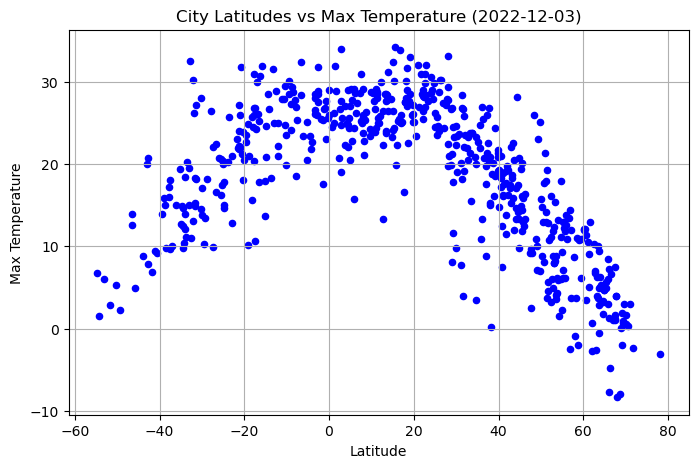

In [12]:
# Build scatter plot for latitude vs. temperature
lat_temp_scatter = lat_temp_df.plot.scatter(x='Lat',y='Max Temp',c='Blue', figsize = (8,5))

# Incorporate the other graph properties

plt.grid()
plt.title("City Latitudes vs Max Temperature (2022-12-03)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

In [14]:
# Create dataframe with subject columns
lat_humi_df = city_data_df[["Lat","Humidity"]]
lat_humi_df

,Lat,Humidity
City_ID,,
0,-43.9535,93
1,11.1635,77
2,59.5667,77
3,42.0970,84
4,-34.4187,87
...,...,...
563,59.3833,77
564,54.9076,89
565,41.1415,79


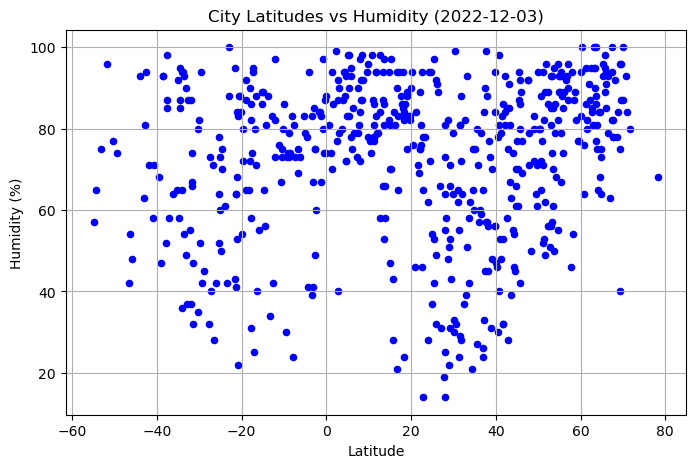

In [15]:
# Build the scatter plots for latitude vs. humidity
lat_humi_scatter = lat_humi_df.plot.scatter(x='Lat',y='Humidity',c='Blue', figsize = (8,5))

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitudes vs Humidity (2022-12-03)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [16]:
# Create dataframe with subject columns
lat_cloud_df = city_data_df[["Lat","Cloudiness"]]
lat_cloud_df

,Lat,Cloudiness
City_ID,,
0,-43.9535,100
1,11.1635,72
2,59.5667,35
3,42.0970,0
4,-34.4187,0
...,...,...
563,59.3833,6
564,54.9076,100
565,41.1415,0


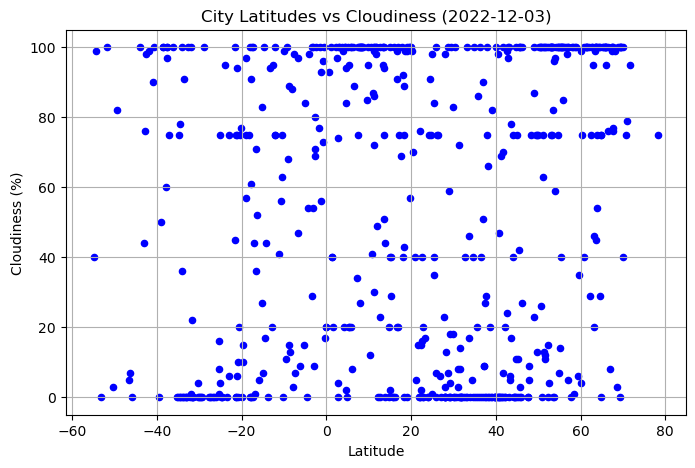

In [17]:
# Build the scatter plots for latitude vs. cloudiness
lat_cloud_scatter = lat_cloud_df.plot.scatter(x='Lat',y='Cloudiness',c='Blue', figsize = (8,5))

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitudes vs Cloudiness (2022-12-03)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [18]:
# Create dataframe with subject columns
lat_wind_df = city_data_df[["Lat","Wind Speed"]]
lat_wind_df

,Lat,Wind Speed
City_ID,,
0,-43.9535,6.26
1,11.1635,7.58
2,59.5667,3.13
3,42.0970,2.57
4,-34.4187,2.60
...,...,...
563,59.3833,4.67
564,54.9076,0.89
565,41.1415,0.45


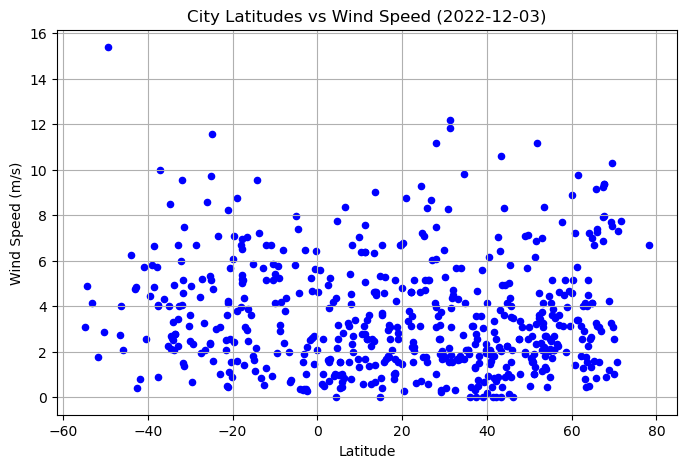

In [19]:
# Build the scatter plots for latitude vs. wind speed
lat_wind_scatter = lat_wind_df.plot.scatter(x='Lat',y='Wind Speed',c='Blue', figsize = (8,5))

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitudes vs Wind Speed (2022-12-03)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
def linear_regression(x_values,y_values,xlabel,ylabel):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(8,5))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"red")
    plt.annotate(line_eq,(6,1),fontsize=12,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    print(f'The r-value is:{rvalue}')
    plt.show()

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,rongelap,11.1635,166.8941,29.16,77,72,7.58,MH,1696293618
2,magadan,59.5667,150.8000,10.85,77,35,3.13,RU,1696293618
3,jamestown,42.0970,-79.2353,19.80,84,0,2.57,US,1696293618
5,enewetak,11.3474,162.3373,28.49,78,100,5.07,MH,1696293619
10,vorgashor,67.5833,63.9500,0.99,82,100,7.97,RU,1696293620


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,8.79,93,100,6.26,NZ,1696293617
4,hermanus,-34.4187,19.2345,14.67,87,0,2.60,ZA,1696293618
6,grytviken,-54.2811,-36.5092,1.52,65,99,4.87,GS,1696293619
7,adamstown,-25.0660,-130.1015,20.41,73,4,9.74,PN,1696293619
8,port mathurin,-19.6833,63.4167,23.53,80,15,7.07,MU,1696293619


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.8452248602320889


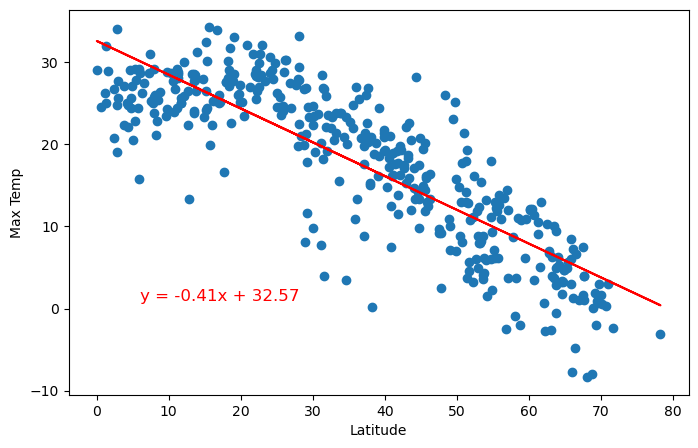

In [25]:
# Linear regression on Northern Hemisphere
linear_regression(x_values = northern_hemi_df["Lat"], y_values = northern_hemi_df["Max Temp"],xlabel = "Latitude",ylabel = "Max Temp")

The r-value is:0.742417299188739


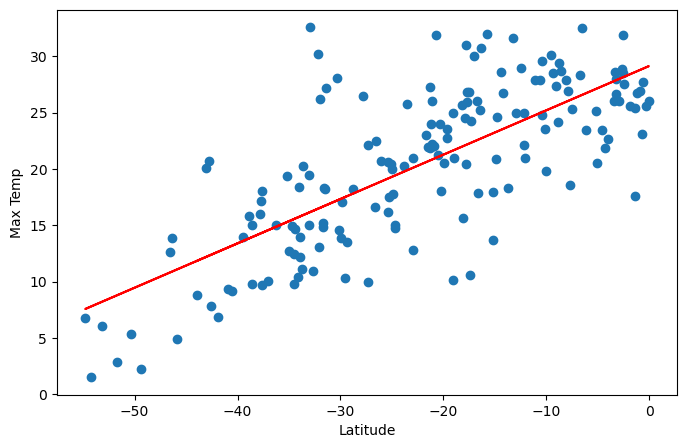

In [26]:
# Linear regression on Southern Hemisphere
linear_regression(x_values = southern_hemi_df["Lat"], y_values = southern_hemi_df["Max Temp"],xlabel = "Latitude",ylabel = "Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.055916336546033896


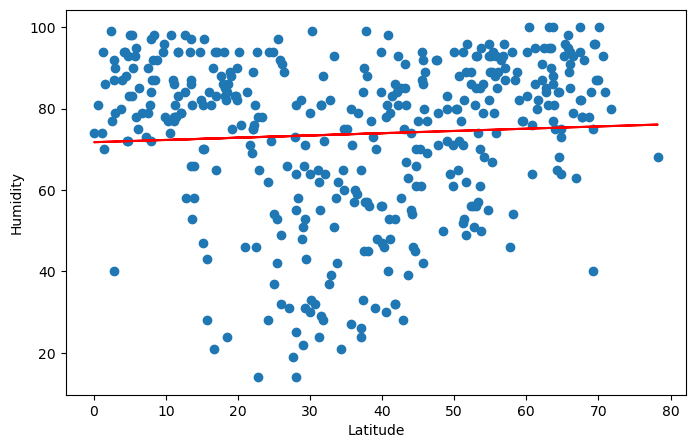

In [27]:
# Northern Hemisphere
linear_regression(x_values = northern_hemi_df["Lat"], y_values = northern_hemi_df["Humidity"],xlabel = "Latitude",ylabel = "Humidity")

The r-value is:0.06988289710174109


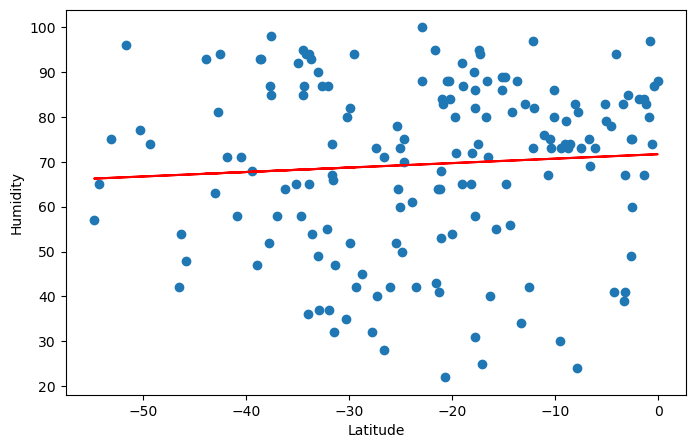

In [28]:
# Southern Hemisphere
linear_regression(x_values = southern_hemi_df["Lat"], y_values = southern_hemi_df["Humidity"],xlabel = "Latitude",ylabel = "Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.11928535283469248


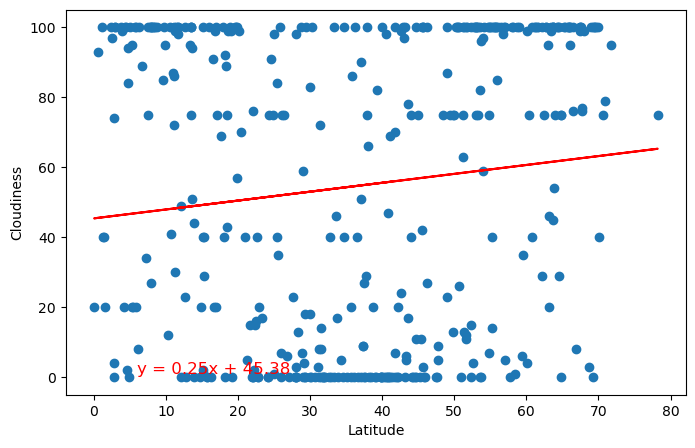

In [29]:
# Northern Hemisphere
linear_regression(x_values = northern_hemi_df["Lat"], y_values = northern_hemi_df["Cloudiness"],xlabel = "Latitude",ylabel = "Cloudiness")

The r-value is:0.1270576904746392


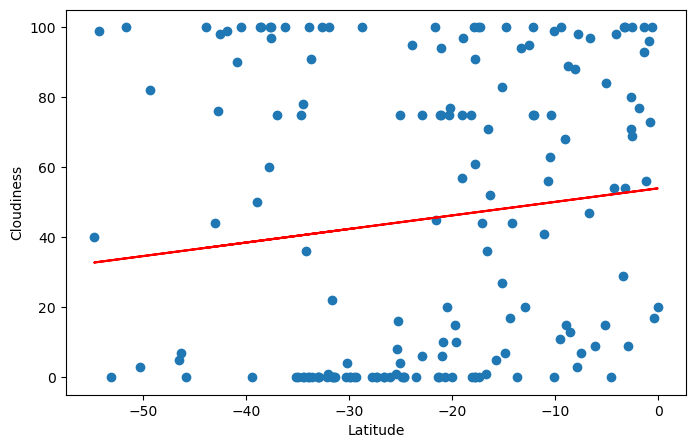

In [30]:
# Southern Hemisphere
linear_regression(x_values = southern_hemi_df["Lat"], y_values = southern_hemi_df["Cloudiness"],xlabel = "Latitude",ylabel = "Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.1227195981883621


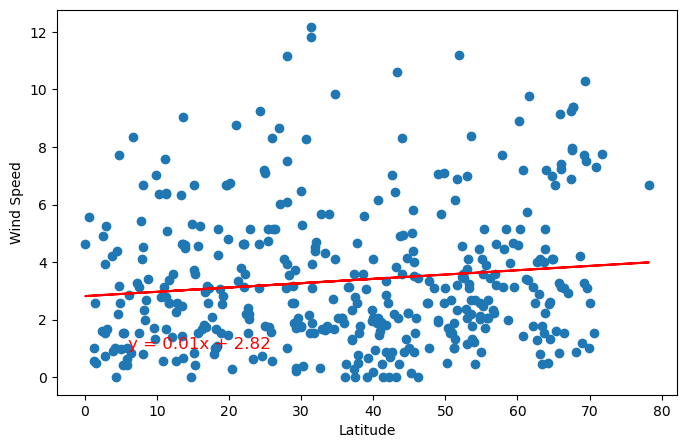

In [31]:
# Northern Hemisphere
linear_regression(x_values = northern_hemi_df["Lat"], y_values = northern_hemi_df["Wind Speed"],xlabel = "Latitude",ylabel = "Wind Speed")

The r-value is:-0.12304993993349057


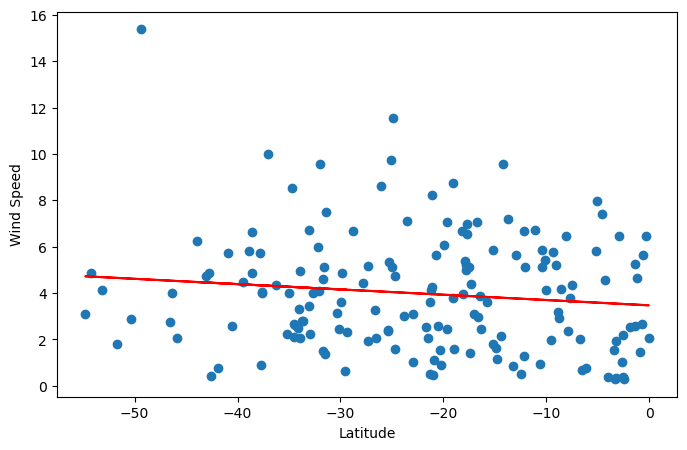

In [32]:
# Southern Hemisphere
linear_regression(x_values = southern_hemi_df["Lat"], y_values = southern_hemi_df["Wind Speed"],xlabel = "Latitude",ylabel = "Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [33]:
In the northern hemisphere, there's a slight positive correlation between latitude and wind speed, with an r value of 0.2019. Conversely, in the southern hemisphere, the data indicates a mild negative correlation between latitude and wind speed, reflected by an r value of -0.2390.

SyntaxError: unterminated string literal (detected at line 1) (516806393.py, line 1)